# SST and streamplots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
import glob

In [2]:
case_name = 'Strong'
years = '[1-2]'

In [3]:
x_array = np.arange(0, 1122*2.5, 2.5)
y_array = np.arange(20*2.5, 430*2.5, 2.5)
x_rho, y_rho = np.meshgrid(x_array, y_array)

In [4]:
heat_balance_files = glob.glob('../monthly_ml_heat_budget_data_small_mesoscale/' + case_name + '/monthly_ml_heat_balance_2016-*_' + case_name + 'Eddies.nc')
heat_balance_files = sorted(heat_balance_files)
heat_balance_files

['../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-01_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-02_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-03_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-04_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-05_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-06_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-07_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-08_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-09_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-10_StrongEddies.nc',
 '../monthly_ml_heat_budget_data/Strong/monthly_ml_heat_balance_2016-11_StrongEddies.nc',
 '../month

In [5]:
heat_ds = xr.open_mfdataset(heat_balance_files, combine = 'nested', concat_dim = 'ocean_time')
heat_ds

<xarray.Dataset>
Dimensions:        (eta_rho: 410, ocean_time: 12, xi_rho: 1122)
Coordinates:
  * eta_rho        (eta_rho) int64 50000 52500 55000 ... 1067500 1070000 1072500
  * xi_rho         (xi_rho) int64 0 2500 5000 7500 ... 2797500 2800000 2802500
Dimensions without coordinates: ocean_time
Data variables:
    eddy_adv_ml    (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    temp_adv_ml    (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    temp_rate_ml   (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    temp1_rate_ml  (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    shflux_ml      (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    residual       (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    SSTA           (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    SSTA_rate      (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    MLD            (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    x_rho          (ocean_time, eta_rho, xi_rho) int64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>
    y_rho          (ocean_time, eta_rho, xi_rho) int64 dask.array<chunksize=(1, 410, 1122), meta=np.ndarray>

In [6]:
eddy_adv_ml = heat_ds.eddy_adv_ml.data * -1 ## Move to the RHS of the heat budget
temp_rate_ml = heat_ds.temp_rate_ml.data
temp1_rate_ml = heat_ds.temp1_rate_ml.data

# SSTA and eddy heat advection

In [7]:
ocn_ds = xr.open_dataset('../SST_UV_data/SST_2016-08_StrongEddies.nc')

In [8]:
U_ds = xr.open_dataset('../SST_UV_data/Surface_U_2016-08_StrongEddies.nc')
V_ds = xr.open_dataset('../SST_UV_data/Surface_V_2016-08_StrongEddies.nc')

In [9]:
V_ds, U_ds

(<xarray.Dataset>
 Dimensions:  (eta_v: 410, xi_v: 1122)
 Coordinates:
     s_rho    float64 ...
     x_v      (eta_v, xi_v) float64 ...
     y_v      (eta_v, xi_v) float64 ...
 Dimensions without coordinates: eta_v, xi_v
 Data variables:
     v        (eta_v, xi_v) float32 ...,
 <xarray.Dataset>
 Dimensions:  (eta_u: 410, xi_u: 1121)
 Coordinates:
     s_rho    float64 ...
     x_u      (eta_u, xi_u) float64 ...
     y_u      (eta_u, xi_u) float64 ...
 Dimensions without coordinates: eta_u, xi_u
 Data variables:
     u        (eta_u, xi_u) float32 ...)

In [10]:
SST = ocn_ds.temp[:].data
u, v = U_ds.u[:].data, V_ds.v[:].data

# zonal-mean anomalies

In [11]:
SST_zonal_mean = SST[:, 20:1101].mean(axis = -1)
EDDY_ADV_zonal_mean = eddy_adv_ml.mean(axis = -1)

In [12]:
SST_ZONAL_2D= np.repeat(SST_zonal_mean[:,np.newaxis], repeats = 1122,axis = -1)
SSTA = SST - SST_ZONAL_2D
EDDY_ADV_ZONAL_2D = np.repeat(EDDY_ADV_zonal_mean[:,np.newaxis], repeats = 1122,axis = -1)

In [13]:
u_mean, v_mean = u.mean(axis = -1), v.mean(axis = -1)
UMEAN, VMEAN = np.repeat(u_mean[:, np.newaxis],1121, axis = -1), np.repeat(v_mean[:, np.newaxis],1121, axis = -1)
U1, V1 = u - UMEAN, v[:,:-1] - VMEAN

# 300-km anomalies

In [14]:
def eddy_filter_300km(var):
    '''
    Input: varibale numpy arary with dimensions [time, z, y, z]
    Return: 500km-rolling-mean var and eddy fields
    '''
    from scipy.ndimage import uniform_filter
    var_500km_mean, var_eddy = np.ma.masked_all(var.shape), np.ma.masked_all(var.shape)
        
    for t in range(var.shape[0]):
        var_500km_mean[t] = uniform_filter(var[t], size = 120, mode = 'constant')
        var_eddy[t]       = var[t] - var_500km_mean[t]
    return var_500km_mean, var_eddy

In [15]:
SSTmean_300_Weak, SSTA_300_Weak = eddy_filter_300km(SST)
umean_300_Weak, u_300_Weak = eddy_filter_300km(u)
vmean_300_Weak, v_300_Weak = eddy_filter_300km(v)

<ipython-input-17-7ea10bc72eb6>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_rho[60:350, 60:1062], y_rho[60:350, 60:1062], SST[60:350, 60:1062], cmap = cmo.cm.balance, vmin = 4, vmax = 12)
<ipython-input-17-7ea10bc72eb6>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_rho[60:350, 60:1062], y_rho[60:350, 60:1062], SSTA_300_Weak[60:350, 60:1062], cmap = cmo.cm.balance, vmin = -.8, vmax = .8)
<ipython-input-17-7ea10bc72eb

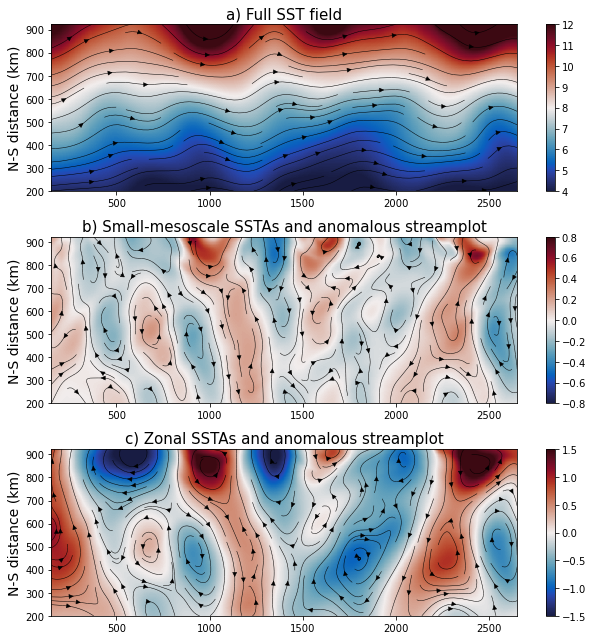

In [17]:
plt.figure(figsize = (9, 9))
plt.subplot(311)
plt.title('a) Full SST field', fontsize = 15)
plt.streamplot(x_rho[60:350, 60:1062], y_rho[60:350, 60:1062], u[60:350, 60:1062], v[60:350, 60:1062],  density = .8, linewidth=.5, color='k')
plt.pcolormesh(x_rho[60:350, 60:1062], y_rho[60:350, 60:1062], SST[60:350, 60:1062], cmap = cmo.cm.balance, vmin = 4, vmax = 12)
plt.colorbar()
#plt.xlabel('W-E distance (km)', fontsize = 14)
plt.ylabel('N-S distance (km)', fontsize = 14)

# ML heating/cooling
plt.subplot(312)
plt.title('b) Small-mesoscale SSTAs and anomalous streamplot', fontsize = 15)
plt.streamplot(x_rho[60:350, 60:1062], y_rho[60:350, 60:1062], u_300_Weak[60:350, 60:1062], v_300_Weak[60:350, 60:1062],  density = 1.5, linewidth=.5, color='k')
plt.pcolormesh(x_rho[60:350, 60:1062], y_rho[60:350, 60:1062], SSTA_300_Weak[60:350, 60:1062], cmap = cmo.cm.balance, vmin = -.8, vmax = .8)
plt.colorbar()
#plt.xlabel('W-E distance (km)', fontsize = 14)
plt.ylabel('N-S distance (km)', fontsize = 14)

# SSTA and streamplot
plt.subplot(313)
plt.title('c) Zonal SSTAs and anomalous streamplot', fontsize = 15)
plt.streamplot(x_rho[60:350, 60:1062], y_rho[60:350, 60:1062], U1[60:350, 60:1062], V1[60:350, 60:1062],  density = 1.5, linewidth=.5, color='k')
plt.pcolormesh(x_rho[60:350, 60:1062], y_rho[60:350, 60:1062], SSTA[60:350, 60:1062], cmap = cmo.cm.balance, vmin = -1.5, vmax = 1.5)
plt.colorbar()
#plt.xlabel('W-E distance (km)', fontsize = 14)
plt.ylabel('N-S distance (km)', fontsize = 14)

plt.tight_layout()
plt.savefig('./Fig02_SSTA_STREAMPLOT_Aug.png', dpi = 120)